# Visual Q&A Demo

## Setup
1-Installs required packages   
2-Downloads sample data and a pretrained model.     

In [40]:
using Pkg; Pkg.activate("."); Pkg.instantiate(); #install required packages
include("demosetup.jl") 
include("src/main.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Demo setup is completed


scalepixel (generic function with 1 method)

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
    * w2i : words to one-hot index   : w2i["cube"] = 30  
    * a2i : answer to one-hot index  : a2i["gray"] = 8
    * i2w : one-hot index to words   : i2w[2] = "Are"   
    * i2a : one-hot index to answers : i2a[5] = "large"   
2-Loads the pretrained model, and its hyper-parameters `o`.     

In [41]:
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,Mrun,o = loadmodel("models/macnet.jld2";onlywrun=true);

Loading demo features ...
Loading demo questions ...
Loading dictionaries ...


## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [54]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = atype(feats[:,:,:,rnd:rnd])
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
answer==prediction[1]

true

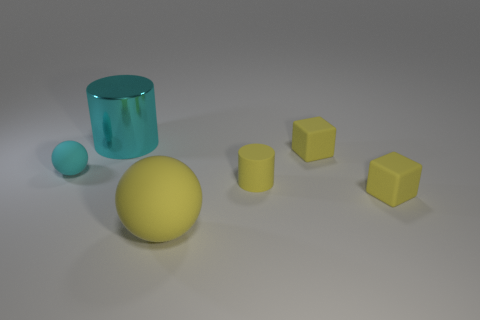

In [55]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [56]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: What is the object that is on the left side of the large yellow rubber sphere and in front of the large cyan thing made of ?
Answer: rubber
Prediction: rubber 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [57]:
userinput = readline(stdin)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> What is the object that is on the left side of the large yellow rubber sphere and in front of the large cyan thing made of ?
Question: What is the object that is on the left side of the large yellow rubber sphere and in front of the large cyan thing made of ?
Prediction: rubber


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

Top-3 Attended Words:
("cyan", "45.97%")
("large", "28.83%")
("thing", "12.04%")
Image Attention Map: 


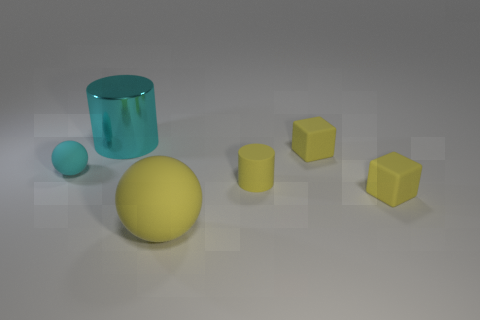

Top-3 Attended Words:
("yellow", "40.73%")
("large", "38.57%")
("rubber", "12.41%")
Image Attention Map: 


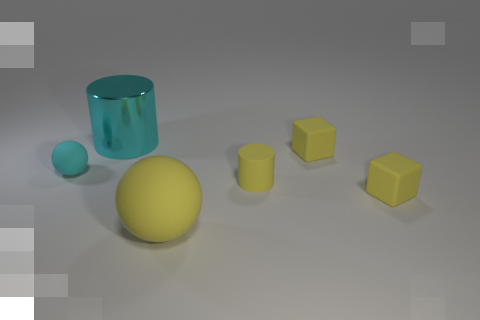

Top-3 Attended Words:
("yellow", "39.76%")
("large", "36.18%")
("rubber", "15.12%")
Image Attention Map: 


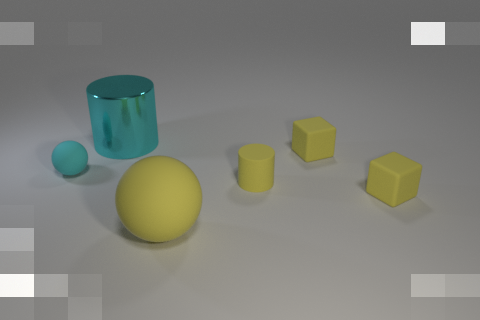

Top-3 Attended Words:
("cyan", "25.76%")
("the", "22.29%")
("large", "22.29%")
Image Attention Map: 


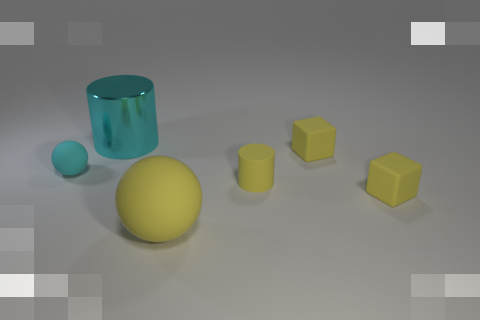

Top-3 Attended Words:
("cyan", "67.46%")
("large", "24.36%")
("thing", "6.43%")
Image Attention Map: 


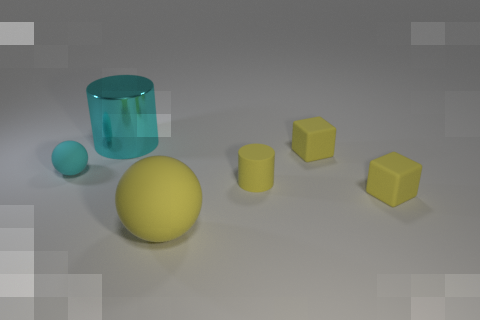

Top-3 Attended Words:
("cyan", "53.62%")
("large", "35.51%")
("thing", "7.70%")
Image Attention Map: 


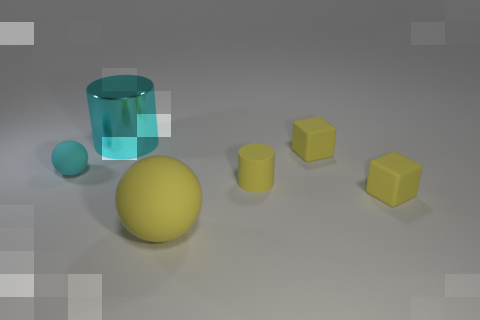

Top-3 Attended Words:
("yellow", "42.36%")
("large", "37.44%")
("rubber", "13.89%")
Image Attention Map: 


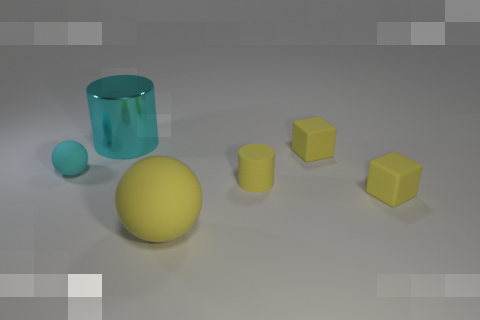

Top-3 Attended Words:
("and", "21.02%")
("?", "19.01%")
("the", "16.60%")
Image Attention Map: 


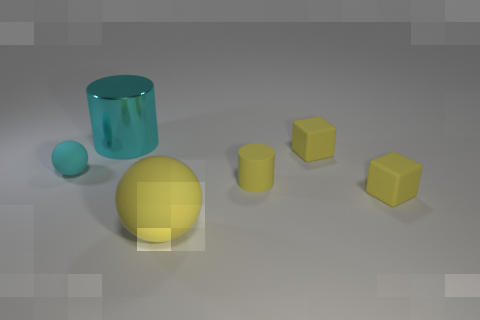

Top-3 Attended Words:
("the", "21.05%")
("?", "14.41%")
("and", "10.11%")
Image Attention Map: 


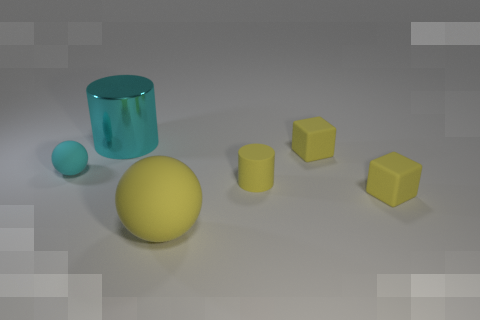

Top-3 Attended Words:
("object", "39.04%")
("What", "16.62%")
("?", "12.54%")
Image Attention Map: 


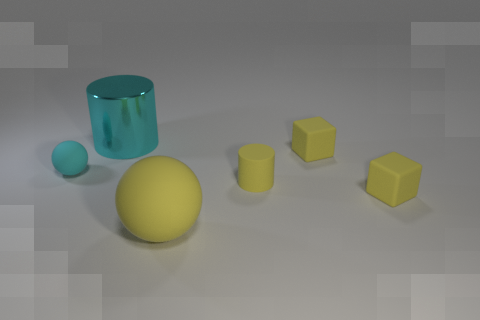

Top-3 Attended Words:
("object", "25.16%")
("?", "22.07%")
("What", "14.80%")
Image Attention Map: 


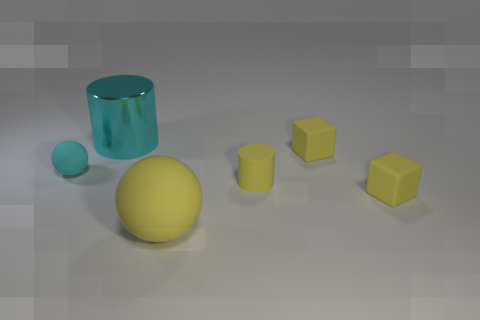

Top-3 Attended Words:
("object", "90.64%")
("What", "2.89%")
("that", "1.42%")
Image Attention Map: 


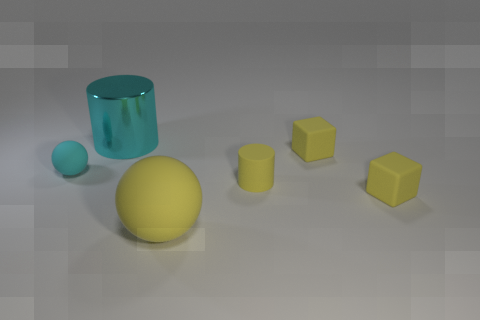

In [58]:
visualize(img,results;p=o[:p])